In [ ]:
import os
cur_dir = os.getcwd()
result_dir = os.path.join(cur_dir, '..', '..', 'results')

path_dict = {
    "permutation": os.path.join(result_dir, "permutation", "permutation_analysis_mean_std_ratio0.1.csv"),
    "IG": {
        "los": os.path.join(result_dir, 'integrated_gradients', 'sampled', 'IG_abs_los_mean_step200_0.1_global_importance.csv'),
        "x": os.path.join(result_dir, 'integrated_gradients', 'sampled', 'IG_abs_x_mean_step200_0.1_global_importance.csv')
    },
    "GB-IG": {
        "ad": os.path.join(result_dir, "graph_based_integrated_gradients", "(mean_abs)_global_importance_ad_42.csv"),
        "dis": os.path.join(result_dir, "graph_based_integrated_gradients", "(mean_abs)_global_importance_dis_42.csv")
    }
}

In [ ]:
import pandas as pd

permutation_df = pd.read_csv(path_dict["permutation"])

In [ ]:
ig_x_df = pd.read_csv(path_dict["IG"]["x"])
ig_los_df = pd.read_csv(path_dict["IG"]["los"])

IG_combined_df = pd.concat([ig_x_df, ig_los_df], ignore_index=True)
IG_combined_df = IG_combined_df.sort_values(by=['mean'], ascending=False, ignore_index=True)
IG_combined_df.to_csv("IG.csv")

In [ ]:
GBIG_ad_df = pd.read_csv(path_dict["GB-IG"]["ad"])
GBIG_dis_df = pd.read_csv(path_dict["GB-IG"]["dis"])
GBIG_dis_df

,idx,name,mean,std,mean_minus_std,mean_plus_std,cv,rank_mean
0,7,ARRESTS_D,0.940971,0.001872,0.939099,0.942843,0.001990,1
1,59,CBSA2020,0.895717,0.005403,0.890314,0.901120,0.006032,2
2,15,DAYWAIT,0.732919,0.008286,0.724633,0.741204,0.011305,3
3,28,FREQ1_D,0.680869,0.006852,0.674017,0.687721,0.010064,4
4,32,FRSTUSE2,0.598690,0.002111,0.596580,0.600801,0.003525,5
5,36,FREQ_ATND_SELF_HELP_D,0.593266,0.006238,0.587028,0.599505,0.010515,6
6,3,SERVICES_D,0.582609,0.005773,0.576836,0.588382,0.009908,7
7,55,DIVISION,0.528623,0.006777,0.521845,0.535400,0.012821,8
8,42,OPSYNFLG,0.510219,0.004661,0.505558,0.514880,0.009135,9
9,9,METHUSE,0.500779,0.004131,0.496648,0.504910,0.008250,10


In [ ]:
import pandas as pd
from typing import Literal

def merge_ad_dis_importance(
    df_ad: pd.DataFrame,
    df_dis: pd.DataFrame,
    reduce: Literal["mean", "weighted"] = "mean",
    w_ad: float = 0.5,
    w_dis: float = 0.5,
) -> pd.DataFrame:
    """
    Merge admission/discharge variable importance tables.

    Policy:
    - Variables present in BOTH ad & dis: merge by (mean or weighted) of abs(importances)
    - Variables present in ONLY one side: keep its abs(importance) as merged_importance (no halving penalty)

    Returns:
      idx, name,
      importance_ad, importance_dis,
      merged_importance,
      diff_dis_minus_ad,   # only meaningful when both exist (else NaN)
      rank_merged
    """

    # --- sanity checks ---
    key_cols = ["idx", "name"]
    for c in key_cols + ["mean"]:
        if c not in df_ad.columns:
            raise ValueError(f"df_ad missing column '{c}'")
        if c not in df_dis.columns:
            raise ValueError(f"df_dis missing column '{c}'")

    if reduce == "weighted":
        if not abs(w_ad + w_dis - 1.0) < 1e-6:
            raise ValueError("w_ad + w_dis must sum to 1.")

    # --- select only necessary columns (KEEP idx!) ---
    ad = df_ad[["idx", "name", "mean"]].rename(columns={"mean": "importance_ad"})
    dis = df_dis[["idx", "name", "mean"]].rename(columns={"mean": "importance_dis"})

    # --- find common / only sets (by key) ---
    keys_ad = set(map(tuple, ad[["idx", "name"]].to_numpy()))
    keys_dis = set(map(tuple, dis[["idx", "name"]].to_numpy()))

    common_keys = keys_ad & keys_dis
    only_ad_keys = keys_ad - keys_dis
    only_dis_keys = keys_dis - keys_ad

    def _subset_by_keys(df: pd.DataFrame, keys: set) -> pd.DataFrame:
        if not keys:
            return df.iloc[0:0].copy()
        kdf = pd.DataFrame(list(keys), columns=["idx", "name"])
        return df.merge(kdf, how="inner", on=["idx", "name"])

    ad_com = _subset_by_keys(ad, common_keys)
    dis_com = _subset_by_keys(dis, common_keys)

    # --- merge common part ---
    df_common = ad_com.merge(dis_com, how="inner", on=["idx", "name"])

    # --- merged_importance for common only ---
    a = df_common["importance_ad"].abs()
    d = df_common["importance_dis"].abs()

    if reduce == "mean":
        df_common["merged_importance"] = 0.5 * (a + d)
    else:  # weighted
        df_common["merged_importance"] = w_ad * a + w_dis * d

    df_common["diff_dis_minus_ad"] = df_common["importance_dis"] - df_common["importance_ad"]

    # --- only-ad / only-dis parts (keep 그대로, no penalty) ---
    df_only_ad = _subset_by_keys(ad, only_ad_keys).copy()
    df_only_dis = _subset_by_keys(dis, only_dis_keys).copy()

    if not df_only_ad.empty:
        df_only_ad["importance_dis"] = pd.NA
        df_only_ad["merged_importance"] = df_only_ad["importance_ad"].abs()
        df_only_ad["diff_dis_minus_ad"] = pd.NA

    if not df_only_dis.empty:
        df_only_dis["importance_ad"] = pd.NA
        df_only_dis["merged_importance"] = df_only_dis["importance_dis"].abs()
        df_only_dis["diff_dis_minus_ad"] = pd.NA

    # --- concat all ---
    df = pd.concat([df_common, df_only_ad, df_only_dis], ignore_index=True)

    # --- ranking ---
    df = df.sort_values("merged_importance", ascending=False).reset_index(drop=True)
    df["rank_merged"] = df.index + 1

    # (optional) column order
    df = df[[
        "idx", "name",
        "importance_ad", "importance_dis",
        "merged_importance",
        "diff_dis_minus_ad",
        "rank_merged"
    ]]

    return df


In [ ]:
# df_ad_ms, df_dis_ms는 importance_mean_std_table로 만든 결과라고 가정

GBIG_merged_df = merge_ad_dis_importance(
    df_ad=GBIG_ad_df,
    df_dis=GBIG_dis_df,
    reduce="mean",   # 가장 권장
)

# 후속 셀과 컬럼 스키마를 맞추기 위해 mean/rank_mean 컬럼을 명시적으로 생성
GBIG_merged_df["mean"] = GBIG_merged_df["merged_importance"]
GBIG_merged_df["rank_mean"] = GBIG_merged_df["rank_merged"]

print(GBIG_merged_df.head(20))

    idx                   name  importance_ad  importance_dis  \
0     7              ARRESTS_D            NaN        0.940971   
1    59               CBSA2020       0.908842        0.895717   
2     7                ARRESTS       0.745135             NaN   
3    15                DAYWAIT       0.732919        0.732919   
4    28                FREQ1_D            NaN        0.680869   
5    32               FRSTUSE2       0.598690        0.598690   
6    36  FREQ_ATND_SELF_HELP_D            NaN        0.593266   
7     3             SERVICES_D            NaN        0.582609   
8    55               DIVISION       0.504924        0.528623   
9    33               FRSTUSE3       0.547122        0.476189   
10   42               OPSYNFLG       0.510219        0.510219   
11   20               DETNLF_D            NaN        0.498315   
12   40                 HERFLG       0.498156        0.498156   
13   30                FREQ3_D            NaN        0.494043   
14   54               OTH

/var/folders/_2/xcfq65k14fsfgp0n7w86w3_m0000gn/T/ipykernel_20809/3274048667.py:88: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_common, df_only_ad, df_only_dis], ignore_index=True)


In [ ]:
GBIG_merged_df["name"]

0     ARRESTS_D
1      CBSA2020
2       ARRESTS
3       DAYWAIT
4       FREQ1_D
        ...    
67       INHFLG
68      METHFLG
69      TRNQFLG
70      BARBFLG
71       OTCFLG
Name: name, Length: 72, dtype: object

In [ ]:
import pandas as pd
import numpy as np

# 비교할 데이터셋 정의
# 주의: 각 DF는 최소한 name, mean 컬럼을 가져야 함
# csv_rank 모드에서는 rank_mean 컬럼도 필요함
dfs = [permutation_df, GBIG_merged_df, IG_combined_df]
df_labels = ["Permutation", "GB-IG(merged)", "IG(abs)"]

# dfs = [permutation_df, IG_combined_df]
# df_labels = ["Permutation", "IG(abs)"]

# dfs = [GBIG_merged_df, IG_combined_df]
# df_labels = ["GB-IG(merged)", "IG(abs)"]

# dfs = [permutation_df, GBIG_merged_df]
# df_labels = ["Permutation", "GB-IG(merged)"]

# dfs = [permutation_df, IG_combined_df]
# df_labels = ["Permutation", "IG(abs)"]

# rank_mode:
# - "csv_rank": 각 CSV의 rank_mean(전체 변수 기준 순위)을 그대로 사용
# - "common_rerank": 공통 변수만 남긴 뒤 mean 기준으로 순위를 다시 계산
rank_mode = "common_rerank"

# 1) 공통 변수 추출
common_vars = set(dfs[0]["name"])
for df in dfs[1:]:
    common_vars &= set(df["name"])
common_vars = sorted(common_vars)

# 2) 순위 행렬 생성 (행: 변수명, 열: 데이터셋)
rank_dict = {}
for label, df in zip(df_labels, dfs):
    subset = df[df["name"].isin(common_vars)].copy()

    if rank_mode == "csv_rank":
        if "rank_mean" not in subset.columns:
            raise ValueError(f"{label}에 rank_mean 컬럼이 없습니다.")
        ranks = subset.set_index("name")["rank_mean"].astype(float)
    elif rank_mode == "common_rerank":
        ranks = subset.set_index("name")["mean"].rank(ascending=False, method="first")
    else:
        raise ValueError("rank_mode must be one of: 'csv_rank', 'common_rerank'")

    rank_dict[label] = ranks

rank_df = pd.DataFrame(rank_dict).sort_index()

print(f"rank_mode = {rank_mode}")
print(f"공통 변수 개수 = {len(common_vars)}")
print("--- 생성된 순위 행렬 (행: 변수, 열: 데이터셋) ---")
print(rank_df.head())



rank_mode = common_rerank
공통 변수 개수 = 72
--- 생성된 순위 행렬 (행: 변수, 열: 데이터셋) ---
         Permutation  GB-IG(merged)  IG(abs)
name                                        
AGE             41.0           48.0     56.0
ALCDRUG         37.0           34.0     29.0
ALCFLG          52.0           35.0     34.0
AMPHFLG         66.0           55.0     46.0
ARRESTS         24.0            3.0     63.0


In [ ]:
def calculate_kendall_w(df):
    m = df.shape[1]  # 평가자 수 (데이터프레임 개수)
    n = df.shape[0]  # 평가 대상 수 (변수 개수)
    
    # 각 변수별 순위 합 계산
    row_sums = df.sum(axis=1)
    s = np.sum((row_sums - np.mean(row_sums))**2)
    
    # Kendall's W 공식 적용
    w = (12 * s) / (m**2 * (n**3 - n))
    return w

w_value = calculate_kendall_w(rank_df)
print(f"Kendall's W (Manual): {w_value:.4f}")

Kendall's W (Manual): 0.4609


--- 데이터셋 간 평균 상관계수: 0.1913 ---
                          Pair  Correlation
0  Permutation & GB-IG(merged)     0.363978
1        Permutation & IG(abs)     0.019165
2      GB-IG(merged) & IG(abs)     0.190816


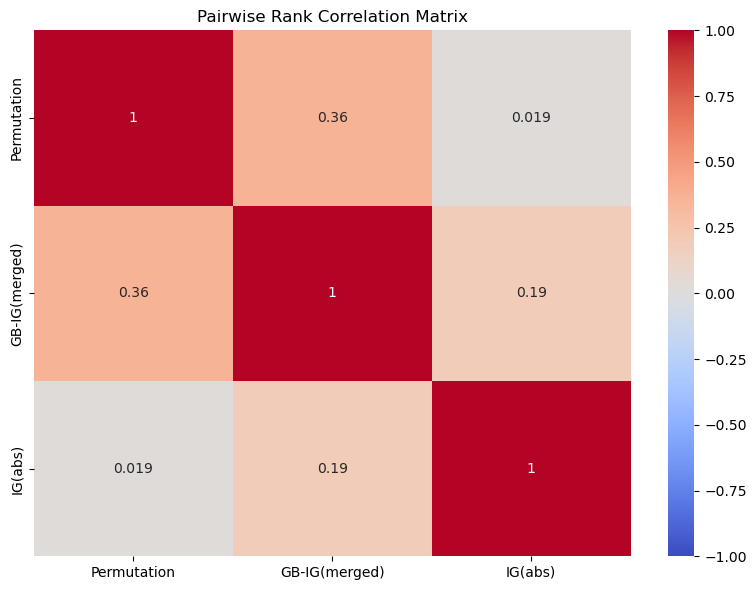

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from itertools import combinations

# rank_df는 앞 셀에서 생성된 순위 행렬을 사용
pairs = list(combinations(rank_df.columns, 2))

corr_list = []
for df_a, df_b in pairs:
    corr, _ = spearmanr(rank_df[df_a], rank_df[df_b])
    corr_list.append({"Pair": f"{df_a} & {df_b}", "Correlation": corr})

corr_results = pd.DataFrame(corr_list)
mean_corr = corr_results["Correlation"].mean()

print(f"--- 데이터셋 간 평균 상관계수: {mean_corr:.4f} ---")
print(corr_results)

plt.figure(figsize=(8, 6))
sns.heatmap(rank_df.corr(method="spearman"), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pairwise Rank Correlation Matrix")
plt.tight_layout()
plt.show()



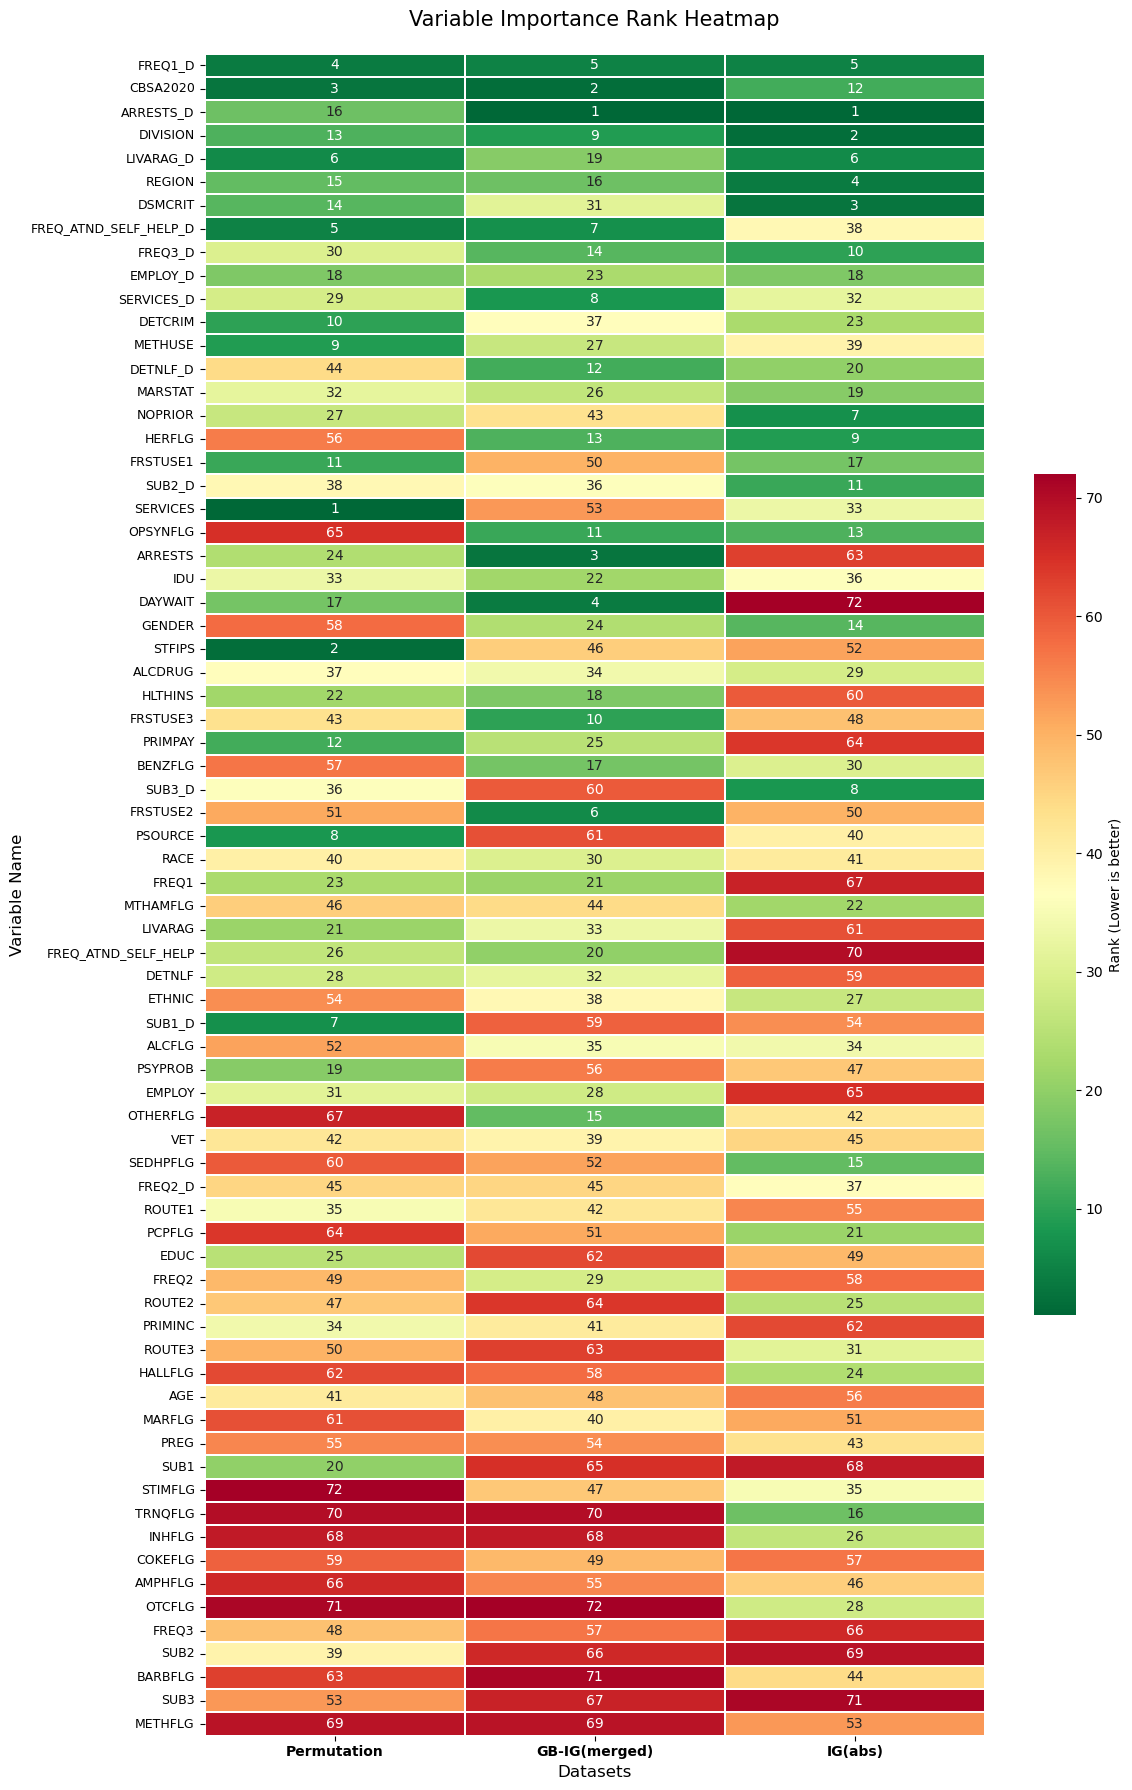

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 행 정렬 방식
# - "average_rank": 데이터셋 평균 순위 기준 정렬(가독성용)
# - "name": 변수명 기준 정렬
row_sort_mode = "average_rank"  

if row_sort_mode == "average_rank":
    rank_df_plot = rank_df.assign(Average_Rank=rank_df.mean(axis=1))                           .sort_values("Average_Rank")                           .drop(columns="Average_Rank")
elif row_sort_mode == "name":
    rank_df_plot = rank_df.sort_index()
else:
    raise ValueError("row_sort_mode must be one of: 'average_rank', 'name'")

num_vars = len(rank_df_plot)
dynamic_height = max(10, num_vars * 0.25)

plt.figure(figsize=(12, dynamic_height))
ax = sns.heatmap(
    rank_df_plot,
    annot=True,
    fmt=".0f",
    cmap="RdYlGn_r",
    cbar_kws={"label": "Rank (Lower is better)", "location": "right", "shrink": 0.5},
    yticklabels=True,
    linewidths=0.1,
)

plt.yticks(rotation=0, fontsize=9)
plt.xticks(fontsize=10, fontweight="bold")
plt.title(f"Variable Importance Rank Heatmap", fontsize=15, pad=20)
plt.ylabel("Variable Name", fontsize=12)
plt.xlabel("Datasets", fontsize=12)
plt.tight_layout()
plt.show()

